titanic


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
path=r"C:\Users\hp\Downloads\train_titanic.xlsx"

In [4]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df=pd.read_excel(path)

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
a=df.isnull().sum()

In [12]:
a[a>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [13]:
x=df.drop(["PassengerId","Name","Survived"],axis=1)
y=df["Survived"]

In [14]:
#seperaation of cat and numerical data

In [15]:
cat=x.columns[x.dtypes=="object"]
num=x.columns[x.dtypes!="object"]

In [16]:
cat

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [17]:
num

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [18]:
x.shape

(891, 9)

In [19]:
x.Cabin.value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [20]:
b=y.value_counts()
b

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

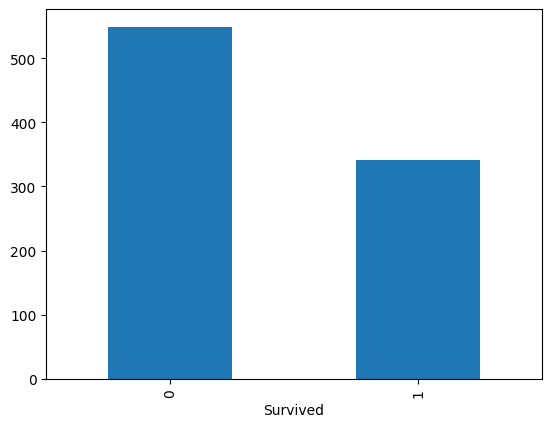

In [21]:
#a.plot(kind="bar")
b.plot(kind="bar")

In [22]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [132]:
#create pipeline
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [ ]:
cat_pipeline1  =  Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy  =  'most_frequent')) ,  
                 ('encoder' ,  OrdinalEncoder())])
cat_pipeline2  = Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy  = 'constant' , fill_value =  'not_Avail')) ,  
                 ('encoder' ,  OrdinalEncoder())])
num_pipeline  =  Pipeline(steps  = [('imputer' ,  SimpleImputer(strategy  =  'mean' )) ,
                ('scaler' ,  StandardScaler())])

NameError: name 'Pipeline' is not defined

In [ ]:
cat1=["Sex","Ticket","Embarked"]
cat2=["Cabin"]

In [135]:
#compose all pipelines
pre=ColumnTransformer([("cat1",cat_pipeline1,cat1),
                   ("cat2",cat_pipeline2,cat2),
                   ("num",num_pipeline,num)
                   

                   ])

In [136]:
pre

,transformers,"[('cat1', ...), ('cat2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [182]:
pre.get_feature_names_out()

array(['cat1__Sex', 'cat1__Ticket', 'cat1__Embarked', 'cat2__Cabin',
       'num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare'],
      dtype=object)

In [137]:
#apply to data
x_scaled

,cat1__Sex_female,cat1__Sex_male,cat1__Ticket_110152,cat1__Ticket_110413,cat1__Ticket_110465,cat1__Ticket_110564,cat1__Ticket_110813,cat1__Ticket_111240,cat1__Ticket_111320,cat1__Ticket_111361,...,cat2__Cabin_F38,cat2__Cabin_F4,cat2__Cabin_G6,cat2__Cabin_T,cat2__Cabin_not_Avail,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.827377,0.000000,0.432793,2.008933,-0.176263
889,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [138]:
cat

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [139]:
x['Sex'].unique()
x['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [140]:
Ticket=np.array(x["Ticket"],dtype="str")
Ticket

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '349909', '347077', '2631', '19950', '330959', '349216',
       'PC 17601', 'PC 17569', '335677', 'C.A. 24579', 'PC 17604',
       '113789', '2677', 'A./5. 2152', '345764', '2651', '7546', '11668',
       '349253', 'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371',
       '14311', '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572',
       '2926', '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651',
       'CA 2144', '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'CA 2144', 'S.O.C. 14879', '2680', '1601', '348123', '349208',
       '374746', '248738', '364516', '345767', '345779', '330932',
       '113059',

In [141]:
x["Ticket"]=Ticket

In [142]:
x["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [143]:
x_scaled=pre.fit_transform(x)
x_scaled

array([[ 1.00000000e+00,  5.23000000e+02,  2.00000000e+00, ...,
         4.32793366e-01, -4.73673609e-01, -5.02445171e-01],
       [ 0.00000000e+00,  5.96000000e+02,  0.00000000e+00, ...,
         4.32793366e-01, -4.73673609e-01,  7.86845294e-01],
       [ 0.00000000e+00,  6.69000000e+02,  2.00000000e+00, ...,
        -4.74545196e-01, -4.73673609e-01, -4.88854258e-01],
       ...,
       [ 0.00000000e+00,  6.75000000e+02,  2.00000000e+00, ...,
         4.32793366e-01,  2.00893337e+00, -1.76263239e-01],
       [ 1.00000000e+00,  8.00000000e+00,  0.00000000e+00, ...,
        -4.74545196e-01, -4.73673609e-01, -4.43810379e-02],
       [ 1.00000000e+00,  4.66000000e+02,  1.00000000e+00, ...,
        -4.74545196e-01, -4.73673609e-01, -4.92377828e-01]],
      shape=(891, 9))

In [144]:
x_scaled=x_scaled.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [145]:
#convert in dataframe
x_scaled=pd.DataFrame(x_scaled)

In [146]:
x_scaled

,0,1,2,3,4,5,6,7,8
0,1.0,523.0,2.0,147.0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,0.0,596.0,0.0,81.0,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,0.0,669.0,2.0,147.0,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,0.0,49.0,2.0,55.0,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,1.0,472.0,2.0,147.0,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...
886,1.0,101.0,2.0,147.0,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,0.0,14.0,2.0,30.0,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,0.0,675.0,2.0,147.0,0.827377,0.000000,0.432793,2.008933,-0.176263
889,1.0,8.0,0.0,60.0,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [147]:
x_scaled.columns=pre.get_feature_names_out()

In [148]:
x_scaled.head()

,cat1__Sex,cat1__Ticket,cat1__Embarked,cat2__Cabin,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
0,1.0,523.0,2.0,147.0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,0.0,596.0,0.0,81.0,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,0.0,669.0,2.0,147.0,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,0.0,49.0,2.0,55.0,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,1.0,472.0,2.0,147.0,0.827377,0.407926,-0.474545,-0.473674,-0.486337


In [149]:
### train test split
from sklearn.model_selection import train_test_split


In [150]:
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=3)

In [151]:
print(x_train.shape,y_train.shape)
print(y_test.shape,x_test.shape)

(712, 9) (712,)
(179,) (179, 9)


In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rf=RandomForestClassifier(n_estimators=100,n_jobs=-1,max_depth=6)

In [154]:
rf

,n_estimators,100
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [155]:
x_train.shape

(712, 9)

In [156]:
y_train.shape

(712,)

In [157]:
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [158]:
rf.score(x_train,y_train)

0.9129213483146067

In [159]:
from sklearn.model_selection import GridSearchCV


In [160]:
para={"n_estimators":(50,55,60,65,70,75),
      "criterion":["gini","entropy"],
      "max_depth":range(4,15)}

In [161]:
model=RandomForestClassifier()
rf_grcv=GridSearchCV(model,param_grid=para,
                     cv=5,n_jobs=-1)

In [162]:
rf_grcv.fit(x_train,y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': range(4, 15), 'n_estimators': (50, ...)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,70


In [163]:
rf_grcv.score(x_train,y_train)

0.9747191011235955

In [164]:
from sklearn.metrics import classification_report,confusion_matrix

In [165]:
#model fitting on boosting 
from sklearn.ensemble import GradientBoostingClassifier

In [166]:
gbc=GradientBoostingClassifier(n_estimators=100,max_depth=14)
gbc.fit(x_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,14
,min_impurity_decrease,0.0
,init,None


In [167]:
gbc.score(x_train,y_train)

0.9985955056179775

In [168]:
gbc.score(x_test,y_test)

0.7486033519553073

In [169]:
##evaluation
train_pred=gbc.predict(x_train)
test_pred=gbc.predict(x_test)

In [170]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       1.00      1.00      1.00       272

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



In [171]:
cfm=confusion_matrix(y_train,train_pred)

<Axes: >

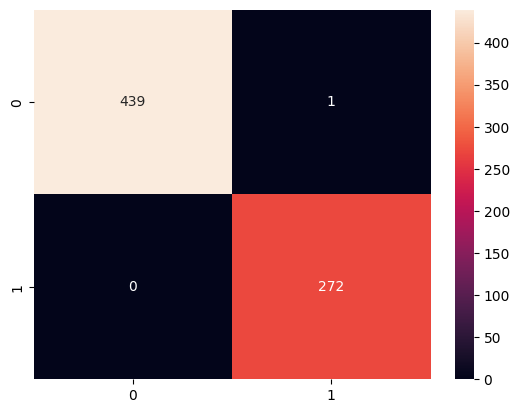

In [172]:
sns.heatmap(cfm,annot=True,xticklabels=True,yticklabels=True,fmt="d")

In [173]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.77       109
           1       0.64      0.81      0.72        70

    accuracy                           0.75       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.75      0.75       179



<Axes: >

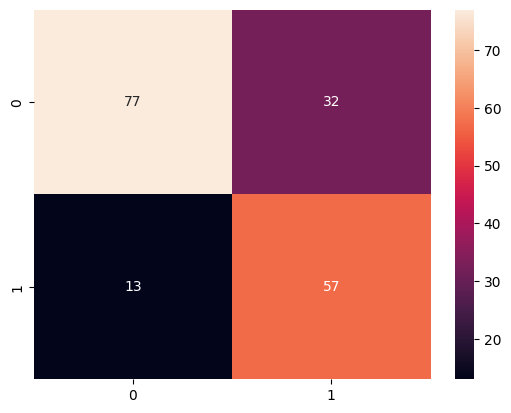

In [174]:
cfm_test=confusion_matrix(y_test,test_pred)
sns.heatmap(cfm_test,annot=True,xticklabels=True,yticklabels=True,fmt="d")

In [175]:
#xgb
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [176]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=100,max_depth=20,n_jobs=-1)

In [177]:
xgb.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [178]:
xgb.score(x_train,y_train)

0.9971910112359551

In [179]:
xgb.score(x_test,y_test)

0.7988826815642458

In [ ]:
#from above all model extreme gradient boosting giving good performance we have to refer this model for future prediction

## sample prediction on unseen data


In [191]:
path=r"C:\Users\hp\Downloads\test_titanic.xlsx"

In [192]:
sample=pd.read_excel(path)

In [193]:
sample.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [194]:
pre

,transformers,"[('cat1', ...), ('cat2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [195]:
Ticket=np.array(sample["Ticket"],dtype=str)

In [196]:
sample["Ticket"]=Ticket

In [197]:
sample_scaled=pre.fit_transform(sample)

In [198]:
sample_scaled=sample_scaled.toarray()


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [ ]:
sample_scaled

array([[ 1.00000000e+00,  1.52000000e+02,  1.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -4.98407056e-01],
       [ 0.00000000e+00,  2.21000000e+02,  2.00000000e+00, ...,
         6.16992373e-01, -4.00247702e-01, -5.13274288e-01],
       [ 1.00000000e+00,  7.30000000e+01,  1.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -4.65088464e-01],
       ...,
       [ 1.00000000e+00,  3.46000000e+02,  2.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -5.08791885e-01],
       [ 1.00000000e+00,  2.20000000e+02,  2.00000000e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -4.94448198e-01],
       [ 1.00000000e+00,  1.05000000e+02,  0.00000000e+00, ...,
         6.16992373e-01,  6.19895831e-01, -2.37905978e-01]],
      shape=(418, 9))

In [ ]:
sample_scaled=pd.DataFrame(sample_scaled,columns=pre.get_feature_names_out())
sample_scaled

,cat1__Sex,cat1__Ticket,cat1__Embarked,cat2__Cabin,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
0,1.0,152.0,1.0,76.0,0.873482,0.334993,-0.499470,-0.400248,-0.498407
1,0.0,221.0,2.0,76.0,0.873482,1.325530,0.616992,-0.400248,-0.513274
2,1.0,73.0,1.0,76.0,-0.315819,2.514175,-0.499470,-0.400248,-0.465088
3,1.0,147.0,2.0,76.0,0.873482,-0.259330,-0.499470,-0.400248,-0.483466
4,0.0,138.0,2.0,76.0,0.873482,-0.655545,0.616992,0.619896,-0.418471
...,...,...,...,...,...,...,...,...,...
413,1.0,267.0,2.0,76.0,0.873482,0.000000,-0.499470,-0.400248,-0.494448
414,0.0,324.0,0.0,22.0,-1.505120,0.691586,-0.499470,-0.400248,1.313753
415,1.0,346.0,2.0,76.0,0.873482,0.651965,-0.499470,-0.400248,-0.508792
416,1.0,220.0,2.0,76.0,0.873482,0.000000,-0.499470,-0.400248,-0.494448


### predict target values

In [ ]:
gbc.predict(sample_scaled)

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,